In [4]:
# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

In [5]:
import numpy as np
import pandas as pd

In [6]:
# Load the CSV file into a DataFrame
eeg_data = pd.read_csv('/Volumes/harris/volkan/fooof/sub-010_ses-01_recording-01_first_12hrs-sleepscore_manual.csv')

# Filter the data to extract only the EEG2 channel as a NumPy array
# Assuming 'EEG2' is the column name
sig = eeg_data['EEG2'].values  # Extract as a NumPy ndarray

# Set sampling rate, and create a times vector for plotting
fs = 512
times = create_times(len(sig)/fs, fs)

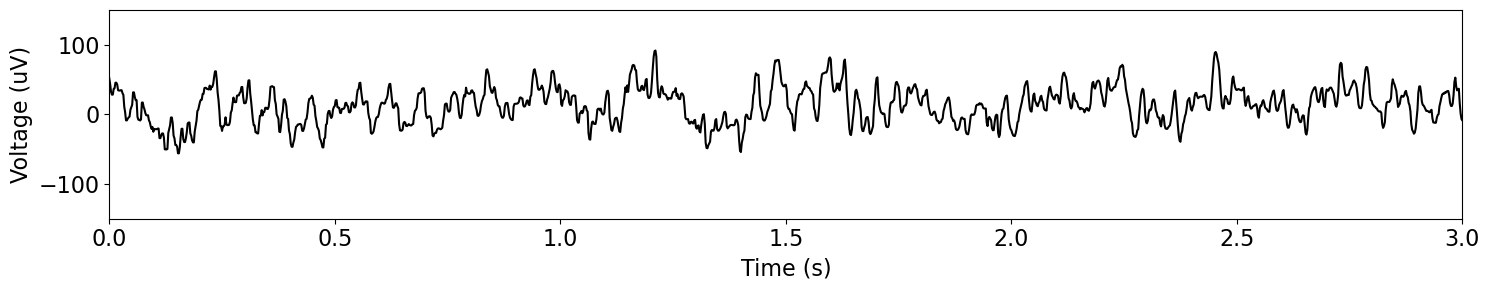

In [7]:
# Plot the loaded signal
plot_time_series(times, sig, xlim=[0, 3], ylim = [-150, 150])

In [8]:
# Duration in seconds of epochs
epoch_duration = 10

# Calculate the number of samples for the first 10 seconds
num_samples = fs * epoch_duration

# Extract the first 10 seconds of data
sig_first_10_seconds = sig[:num_samples]

In [11]:
# Mean of spectrogram (Welch)
freq_mean, psd_mean = compute_spectrum(sig, fs, method='welch', avg_type='mean', nperseg=fs*2)

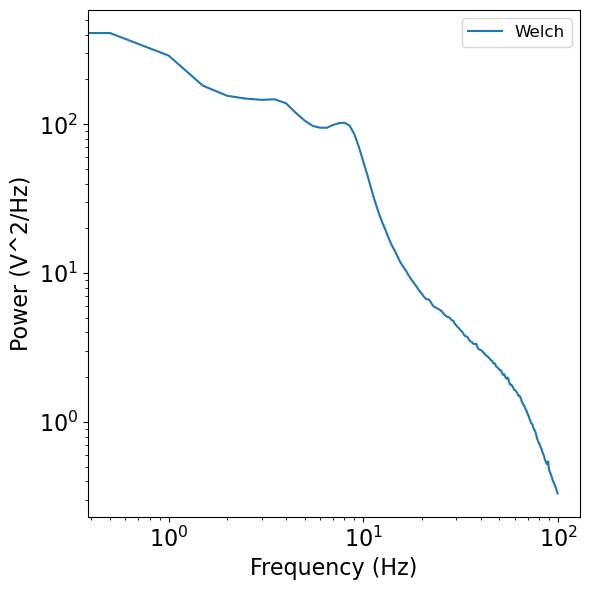

In [12]:
# Plot the power spectra
plot_power_spectra([freq_mean[:200]],
                   [psd_mean[:200]],
                   ['Welch'])


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

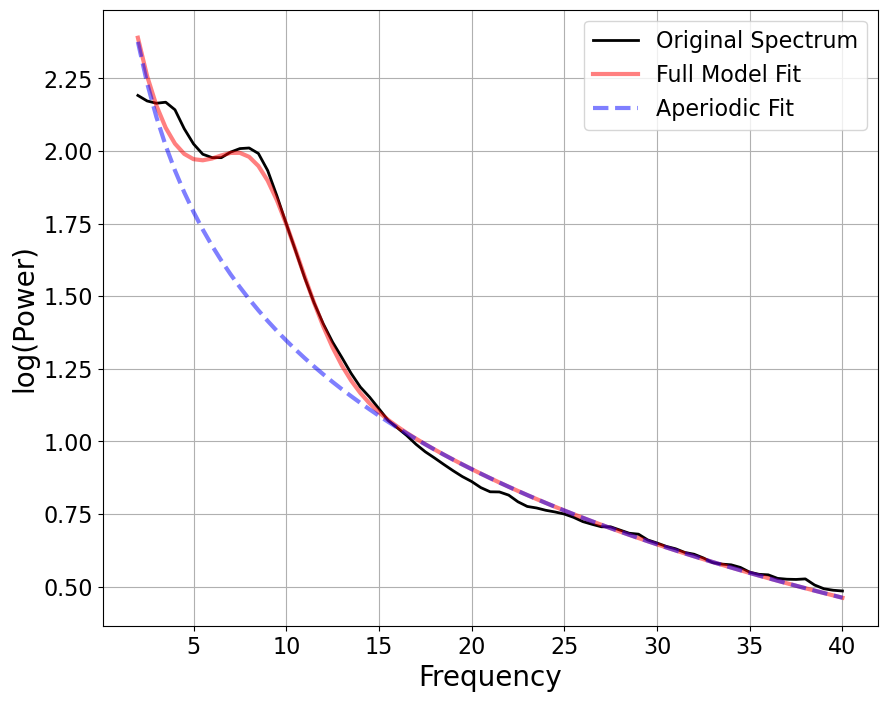

In [14]:
# Import the FOOOF object
from fooof import FOOOF

# Initialize FOOOF object
fm = FOOOF()

# Define frequency range across which to model the spectrum
freq_range = [2, 40]

# Model the power spectrum with FOOOF, and print out a report
fm.report(freq_mean, psd_mean, freq_range)

In [16]:
import numpy as np
from neurodsp.spectral import compute_spectrum
from neurodsp.utils import create_times

num_bins = 43200 // epoch_duration  # Total recording length is 43200 seconds

# Calculate number of samples per bin
samples_per_bin = fs * epoch_duration

# Prepare arrays to store PSD and frequency data
psd_values = []
frequencies = None  # Frequencies are the same for each bin

# Loop over each 10-second bin
for i in range(num_bins):
    # Extract the data for the current bin
    start = i * samples_per_bin
    end = start + samples_per_bin
    bin_data = sig[start:end]
    
    # Compute the power spectrum for this bin
    freqs, psd = compute_spectrum(bin_data, fs, method='welch', avg_type='mean', nperseg=fs*2)
    
    # Store the PSD values
    psd_values.append(psd)
    
    # Store frequencies once
    if frequencies is None:
        frequencies = freqs

# Convert psd_values to a NumPy array for easier handling
psd_values = np.array(psd_values)

In [17]:
# Initialize a FOOOF model object with defined settings
fm = FOOOF(peak_width_limits=[1.0, 8.0], max_n_peaks=6, min_peak_height=0.1,
           peak_threshold=2.0, aperiodic_mode='fixed')

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          2.8187, 1.4713                                          
                                                                                                  
                                       1 peaks were found:                                        
          

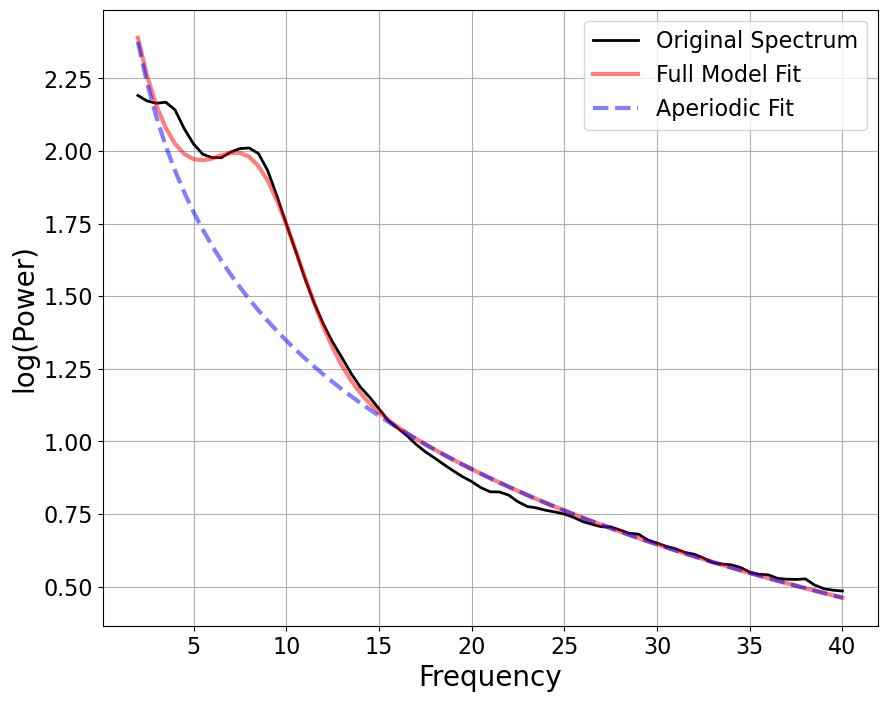

In [18]:
# Define frequency range across which to model the spectrum
freq_range = [2, 40]

# Model the power spectrum with FOOOF, and print out a report
fm.report(freq_mean, psd_mean, freq_range)

In [28]:
from fooof import FOOOFGroup

# Initialize a FOOOFGroup object, specifying some parameters
fg = FOOOFGroup(peak_width_limits=[1.0, 8.0], max_n_peaks=6, min_peak_height=0.1,
           peak_threshold=2.0, aperiodic_mode='fixed')

# Fit FOOOF model across the matrix of power spectra
fg.fit(freqs, psd_values, [2, 40])


Running FOOOFGroup across 4320 power spectra.


In [34]:
valid_results = [result for result in fg.group_results if len(result.peak_params) > 0]
fg.group_results = valid_results

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4320,) + inhomogeneous part.

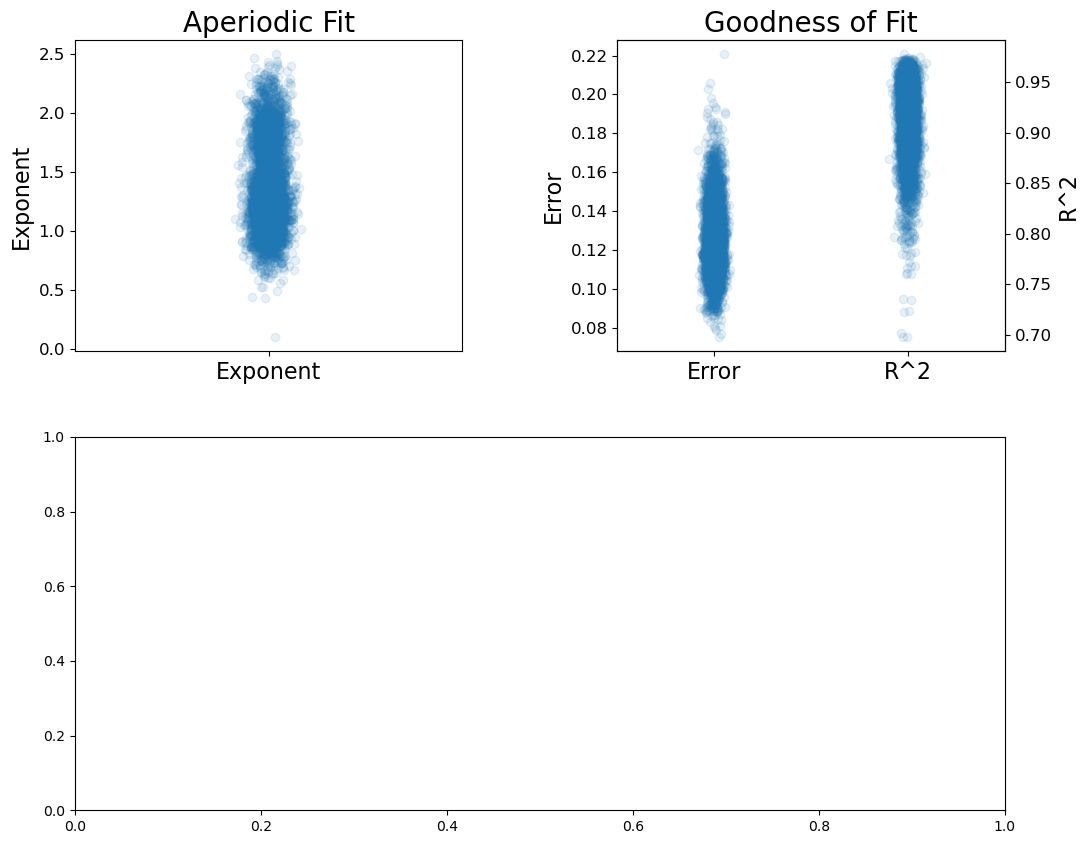

In [36]:
fg.plot()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4320,) + inhomogeneous part.

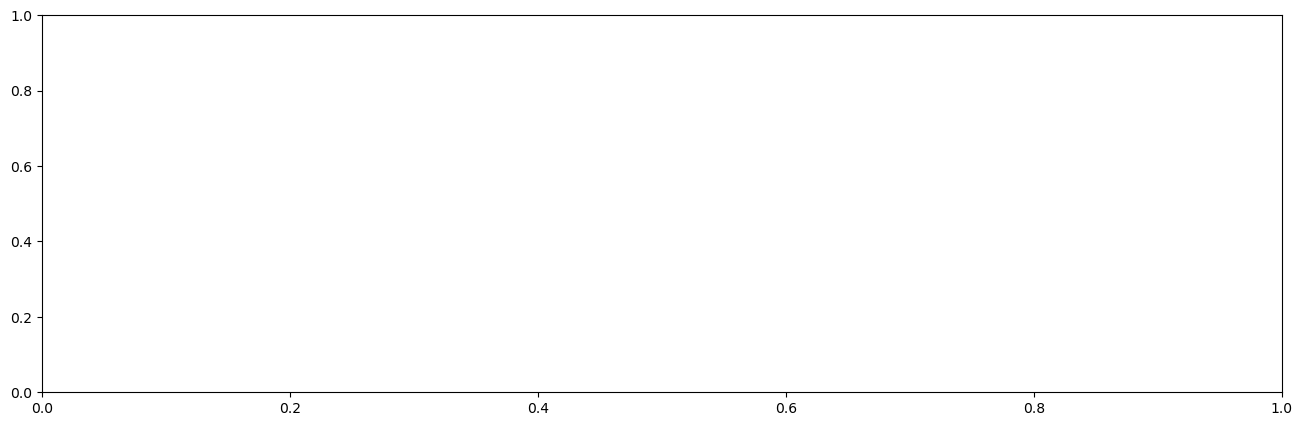

In [37]:
fg.save_report('FOOOFGroup_report')

In [38]:
peaks = fg.get_params('peak_params')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4320,) + inhomogeneous part.

In [39]:
errors = fg.get_params('error')

In [33]:
for i, result in enumerate(fg.group_results):
    print(f"Result {i}: {result.peak_params.shape}")


Result 0: (6, 3)
Result 1: (6, 3)
Result 2: (6, 3)
Result 3: (5, 3)
Result 4: (6, 3)
Result 5: (6, 3)
Result 6: (5, 3)
Result 7: (6, 3)
Result 8: (5, 3)
Result 9: (4, 3)
Result 10: (6, 3)
Result 11: (5, 3)
Result 12: (3, 3)
Result 13: (5, 3)
Result 14: (4, 3)
Result 15: (6, 3)
Result 16: (6, 3)
Result 17: (6, 3)
Result 18: (4, 3)
Result 19: (6, 3)
Result 20: (5, 3)
Result 21: (2, 3)
Result 22: (6, 3)
Result 23: (6, 3)
Result 24: (6, 3)
Result 25: (6, 3)
Result 26: (5, 3)
Result 27: (5, 3)
Result 28: (5, 3)
Result 29: (6, 3)
Result 30: (5, 3)
Result 31: (6, 3)
Result 32: (5, 3)
Result 33: (6, 3)
Result 34: (6, 3)
Result 35: (3, 3)
Result 36: (5, 3)
Result 37: (5, 3)
Result 38: (6, 3)
Result 39: (6, 3)
Result 40: (5, 3)
Result 41: (6, 3)
Result 42: (6, 3)
Result 43: (5, 3)
Result 44: (2, 3)
Result 45: (6, 3)
Result 46: (3, 3)
Result 47: (6, 3)
Result 48: (6, 3)
Result 49: (6, 3)
Result 50: (6, 3)
Result 51: (6, 3)
Result 52: (6, 3)
Result 53: (5, 3)
Result 54: (6, 3)
Result 55: (6, 3)
Re

In [30]:
print(fg)

In [31]:
print(fg.group_results[0])

FOOOFResults(aperiodic_params=array([1.50800418, 0.66757721]), peak_params=array([[ 3.22149178,  0.8495106 ,  1.        ],
       [ 4.66993508,  0.5299246 ,  1.        ],
       [16.16219192,  0.42691884,  7.98855511],
       [16.5       ,  0.42574563,  1.        ],
       [26.15352336,  0.41254079,  1.        ],
       [29.55199651,  0.43215447,  1.8846144 ]]), r_squared=np.float64(0.8068666712314218), error=np.float64(0.13929547970298461), gaussian_params=array([[3.22149178e+00, 9.32862206e-01, 5.00000000e-01],
       [4.66993508e+00, 5.17460365e-01, 5.00000000e-01],
       [1.61621919e+01, 4.27270944e-01, 3.99427755e+00],
       [1.65000000e+01, 6.10406256e-11, 5.00000000e-01],
       [2.61535234e+01, 4.10509031e-01, 5.00000000e-01],
       [2.95519965e+01, 4.31190801e-01, 9.42307199e-01]]))


In [32]:
# Extract aperiodic parameters
aps = fg.get_params('aperiodic_params')
exps = fg.get_params('aperiodic_params', 'exponent')


/var/folders/_n/p_b9638x5g99dbmz8kz99s100000gn/T/ipykernel_12827/1375435691.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  plt.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), exps)


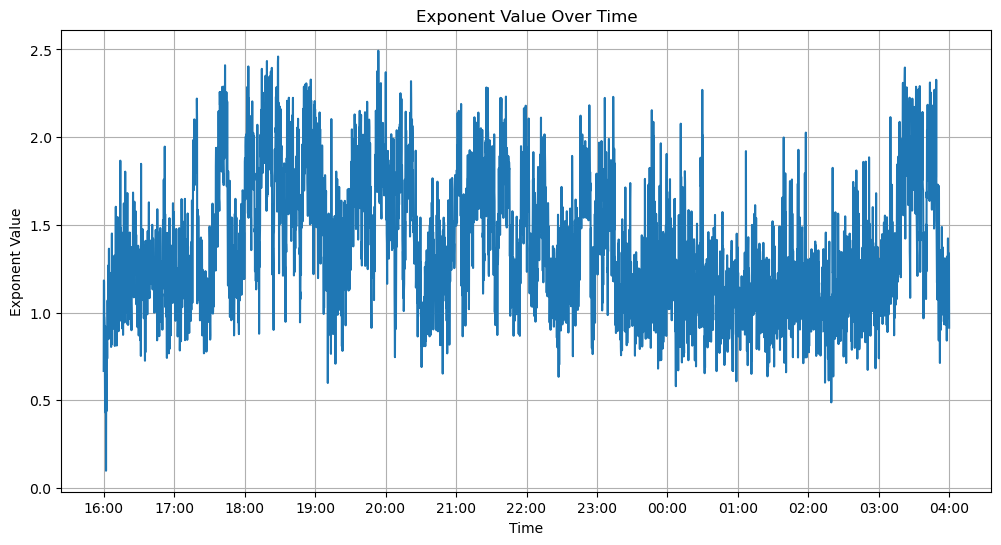

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Calculate time array (43200 seconds, starting at 16:00)
time = np.arange(0, 43200, 10)

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), exps)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Exponent Value')
plt.title('Exponent Value Over Time')

# Format x-axis to display hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Show grid
plt.grid(True)

# Show plot
plt.show()

In [46]:
manual_scoring = pd.read_csv('/Volumes/harris/volkan/fooof/sub-010_ses-01_recording-01_first_12hrs-sleepscore_manual.csv')

In [51]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Extract sleepStage column
sleep_stage_series = manual_scoring['sleepStage']

# Downsample to one value every 10 seconds (512 Hz * 10 seconds = 5120 samples)
downsampled_sleep_stage = sleep_stage_series.groupby(np.arange(len(sleep_stage_series)) // 5120).mean().round().astype(int)

# Convert to DataFrame (optional)
downsampled_sleep_stage_df = downsampled_sleep_stage.to_frame('sleepStage')[:-1]

/var/folders/_n/p_b9638x5g99dbmz8kz99s100000gn/T/ipykernel_12827/3831942711.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ax1.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), exps, color='blue')
/var/folders/_n/p_b9638x5g99dbmz8kz99s100000gn/T/ipykernel_12827/3831942711.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ax2.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), downsampled_sleep_stage_df, color='red')


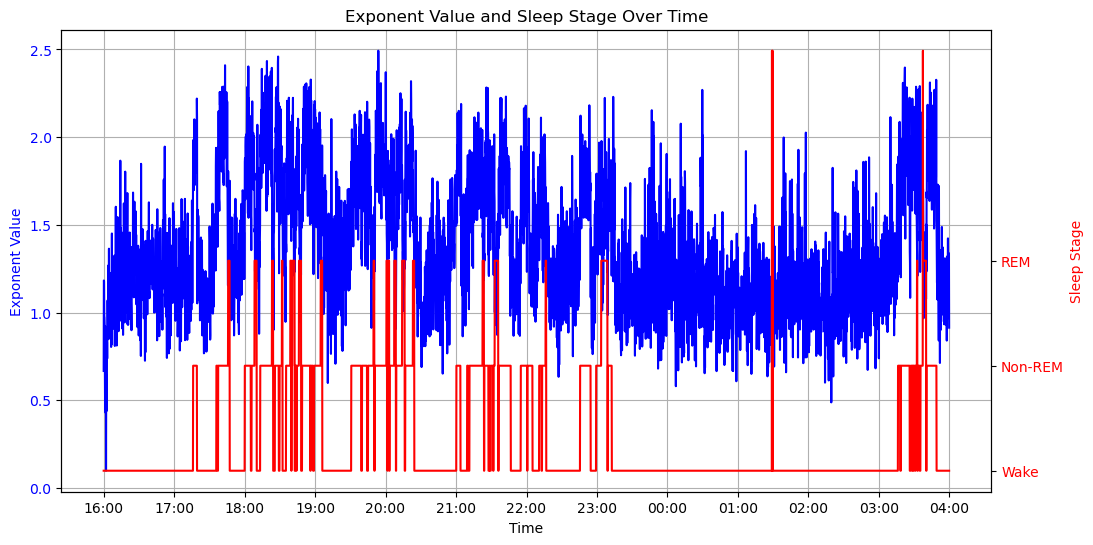

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

# Calculate time array (43200 seconds, starting at 16:00)
time = np.arange(0, 43200, 10)

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot exponent values
ax1.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), exps, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Exponent Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format x-axis to display hours
ax1.xaxis.set_major_locator(mdates.HourLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Plot sleep stage values on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), downsampled_sleep_stage_df, color='red')
ax2.set_ylabel('Sleep Stage', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_yticks([1, 2, 3])
ax2.set_yticklabels(['Wake', 'Non-REM', 'REM'])

# Show grid
ax1.grid(True)

# Show plot
plt.title('Exponent Value and Sleep Stage Over Time')
plt.show()